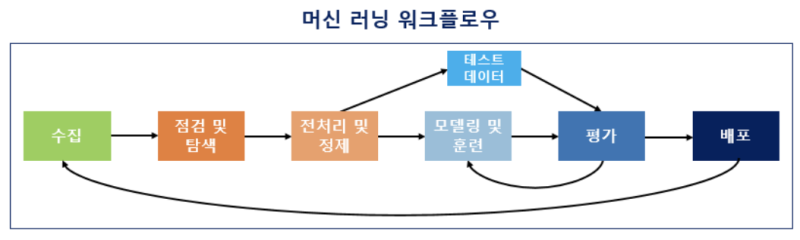

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. 데이터셋을 가져오기(수집)

In [4]:
import os
HOME = os.getcwd()
train_csv = os.path.join(HOME, 'data\\titanic\\train.csv')

# train.csv를 읽어오기
train_df = pd.read_csv(train_csv)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 2. 탐색적 데이터 분석(EDA)

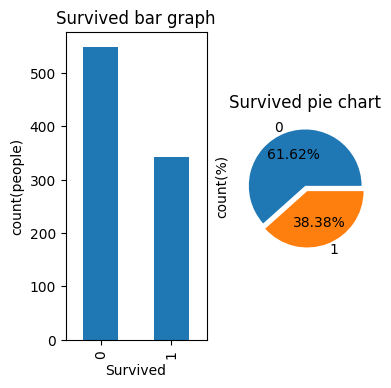

In [24]:
# 생존 여부의 시각화(생각해볼 포인트:어떤 그래프를 그리는 것이 좋을까?)
# 1. bar or barh graph [0]

# 1행 2열로 그래프를 그리려면... 가로 길이 12, 세로 길이 6
f, ax = plt.subplots(1,2,figsize=(12,6))

train_df['Survived'].value_counts().plot(kind='bar',ax=ax[0])
ax[0].set_title('Survived bar graph')
ax[0].set_ylabel('count(people)')

# 2. pie chart [1]
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',figsize=(4,4), ax=ax[1])
ax[1].set_title('Survived pie chart')
ax[1].set_ylabel('count(%)')
plt.show()

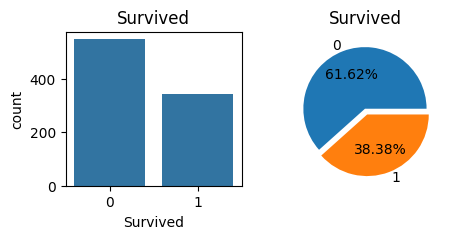

In [30]:
# 생존 여부 분포 시각화
f,ax=plt.subplots(1,2,figsize=(5,2))

# seaborn 최신 버전에서는 x 파라미터를 명시적으로 지정해야 함
sns.countplot(x='Survived', data=train_df, ax=ax[0])
ax[0].set_title('Survived')

train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                             autopct='%1.2f%%',ax=ax[1])
ax[1].set_title('Survived')
ax[1].set_ylabel('')

plt.show()

In [ ]:
# Age의 통계치를 확인  minMax(0.42, 80) -> bins 20으로 설정하면
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

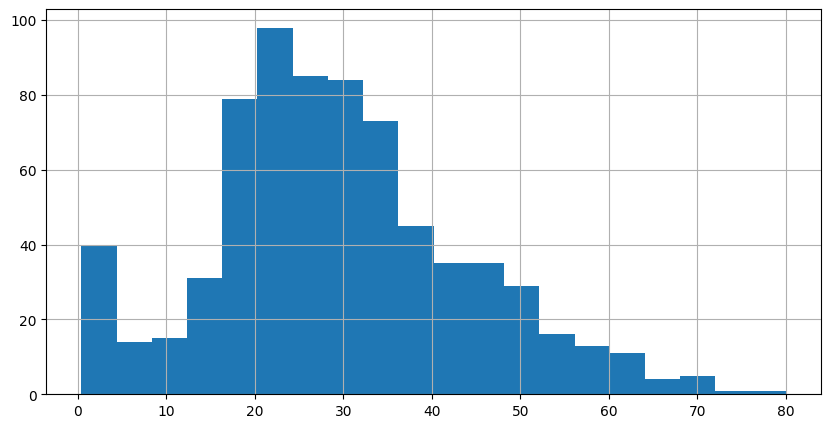

In [33]:
# 나이 분포(Histogram)
# 나이 전체를 몇개로 나눌지 결정 -> bins
train_df['Age'].hist(bins=20, figsize=(10, 5))
plt.show()

In [34]:
# 선실 등급별 평균 생존율,평균 나이, 평균 요금, 가족(Sibsp, Parch)수
train_df.groupby('Pclass').agg({'Survived':'mean', 'Age':'mean', 'Fare':'mean', 'SibSp':'mean', 'Parch':'mean'})


,Survived,Age,Fare,SibSp,Parch
Pclass,,,,,
1,0.629630,38.233441,84.154687,0.416667,0.356481
2,0.472826,29.877630,20.662183,0.402174,0.380435
3,0.242363,25.140620,13.675550,0.615071,0.393075


In [36]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
train_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [38]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [39]:
# 'Sex'와 'Embarked'를 label encoder를 사용하여 변환
from sklearn.preprocessing import LabelEncoder

# 1. 레이블 인코드 생성
label_encoder = LabelEncoder()

# 2. 'Sex'와 'Embarked'를 레이블 인코딩
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])

In [40]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


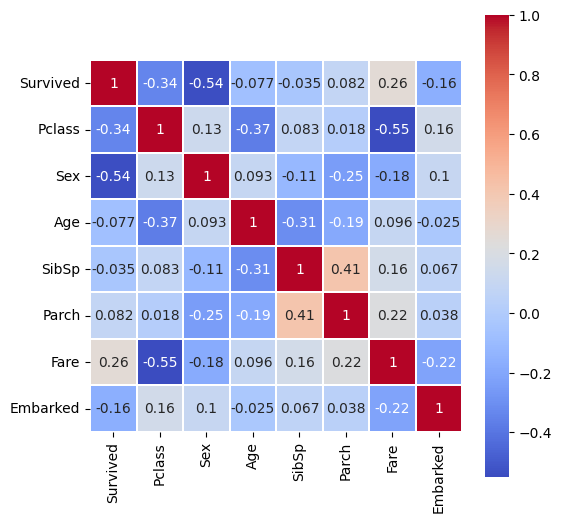

In [51]:
# 상관 관계(벡터의 상관관계) 
# pandas에서 corr()를 seaborn의 heatmap으로 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm',square=True, linecolor="white", linewidths=0.01)
plt.show()

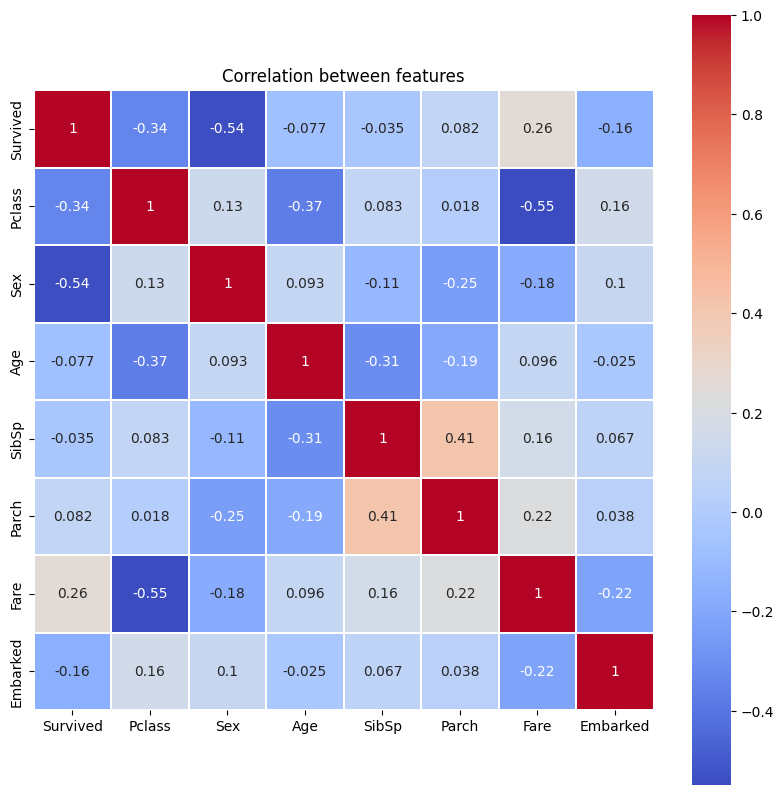

In [52]:
# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(train_df.corr(numeric_only=True), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.coolwarm, linecolor="white")
plt.title('Correlation between features')
plt.show()

#### 3. 전처리(Preprocessing)

#### 4. 모델링(학습)

#### 5. 평가(Evaluation)

#### 6. 배포(Deployment)
* gradio나 streamlit을 사용하여 배포를 합니다.
* 모델을 테스트 하기 위해 환경 제공